In [82]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import seaborn as sns
import tensorflow as tf

In [6]:
obesity= pd.read_csv('obesity.csv')

In [8]:
obesity.head()

Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1        0           0  
2                      1        0           0  
3                      0        1           0  
4                      1        0           0

In [12]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [16]:
obesity.describe()

Gender          Age  family_history_with_overweight         FAVC  \
count  2111.000000  2111.000000                     2111.000000  2111.000000   
mean      0.505921    24.312600                        0.817622     0.883941   
std       0.500083     6.345968                        0.386247     0.320371   
min       0.000000    14.000000                        0.000000     0.000000   
25%       0.000000    19.947192                        1.000000     1.000000   
50%       1.000000    22.777890                        1.000000     1.000000   
75%       1.000000    26.000000                        1.000000     1.000000   
max       1.000000    61.000000                        1.000000     1.000000   

              FCVC          NCP         CAEC        SMOKE         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.419043     2.685628     1.140692     0.020843     2.008011   
std       0.533927     0.778039     0.468543     0.142893     0.612953   
min       1.000000     1.000000     0.000000     0.000000     1.000000   
25%       2.000000     2.658738     1.000000     0.000000     1.584812   
50%       2.385502     3.000000     1.000000     0.000000     2.000000   
75%       3.000000     3.000000     1.000000     0.000000     2.477420   
max       3.000000     4.000000     3.000000     1.000000     3.000000   

               SCC          FAF          TUE         CALC   Automobile  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.045476     1.010298     0.657866     0.731407     0.216485   
std       0.208395     0.850592     0.608927     0.515498     0.411946   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.124505     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.625350     1.000000     0.000000   
75%       0.000000     1.666678     1.000000     1.000000     0.000000   
max       1.000000     3.000000     2.000000     3.000000     1.000000   

              Bike    Motorbike  Public_Transportation      Walking  \
count  2111.000000  2111.000000            2111.000000  2111.000000   
mean      0.003316     0.005211               0.748460     0.026528   
std       0.057502     0.072015               0.434001     0.160737   
min       0.000000     0.000000               0.000000     0.000000   
25%       0.000000     0.000000               0.000000     0.000000   
50%       0.000000     0.000000               1.000000     0.000000   
75%       0.000000     0.000000               1.000000     0.000000   
max       1.000000     1.000000               1.000000     1.000000   

        NObeyesdad  
count  2111.000000  
mean      0.460445  
std       0.498551  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [42]:
# Check for missing values
print("\nMissing Values:")
print(obesity.isnull().sum())


Missing Values:
Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64


In [44]:
# Encode categorical variables
label_encoders = {}
categorical_cols = obesity.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
print("\nEncoded Dataset Head:")
print(obesity.head())


Encoded Dataset Head:
   Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1   

In [30]:
# Split the data into predictor variables and an outcome variable
X = obesity.drop(["NObeyesdad"], axis=1)
y = obesity.NObeyesdad

In [32]:
# Create a logistic regression model
lr = LogisticRegression(max_iter=1000)

In [34]:
# Fit the logistic regression model
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [36]:
# Print the accuracy of the model
print(lr.score(X,y))

0.7659876835622927


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
# Train-test split
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [102]:
y_pred = lr.predict(X_test)
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.7902208201892744
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       346
           1       0.74      0.83      0.78       288

    accuracy                           0.79       634
   macro avg       0.79      0.79      0.79       634
weighted avg       0.80      0.79      0.79       634

Confusion Matrix:
 [[262  84]
 [ 49 239]]


In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues', display_labels=y.unique())
plt.title("Confusion Matrix")


Text(0.5, 1.0, 'Confusion Matrix')

In [106]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target for multi-class ROC curve (if multi-class)
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))
y_pred_prob = lr.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Multi-class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")


In [110]:

# Select two features for 2D plotting
X_2D = X_test.iloc[:, :2]  # Replace with specific features for better interpretability
y_2D = y_test

# Train logistic regression on just two features
lr_2D = LogisticRegression()
lr_2D.fit(X_2D, y_2D)

# Create a mesh grid for decision boundary
x_min, x_max = X_2D.iloc[:, 0].min() - 1, X_2D.iloc[:, 0].max() + 1
y_min, y_max = X_2D.iloc[:, 1].min() - 1, X_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on mesh grid
Z = lr_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=y_2D, edgecolors='k', cmap='coolwarm')
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Text(0, 0.5, 'Predicted Labels')

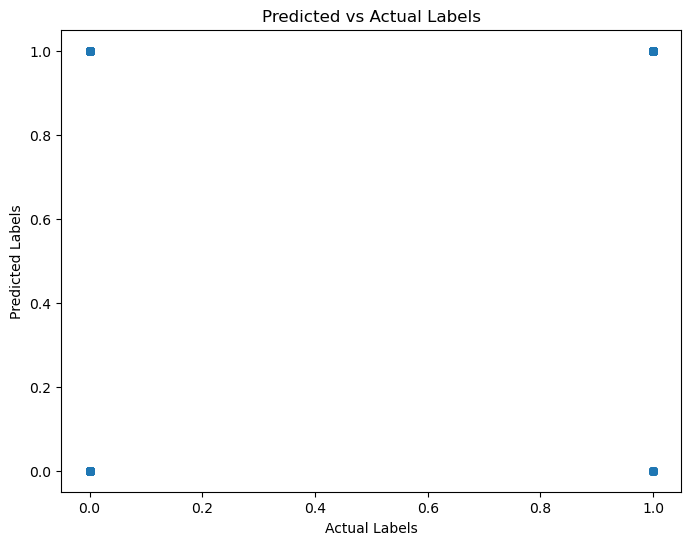

In [112]:
#Predicted vs. Actual Labels
#Visualize how well the model predicts individual cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.title("Predicted vs Actual Labels")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")

In [114]:
# Create a sequential forward selection model
sfs = SFS(lr, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [116]:
# Fit the sequential forward selection model to X and y
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(6, 6), scoring='accuracy')

In [118]:
# Inspect the results of sequential forward selection
print(sfs.subsets_[6])

{'feature_idx': (0, 1, 2, 3, 6, 10), 'cv_scores': array([0.77972525]), 'avg_score': 0.7797252486972999, 'feature_names': (0, 1, 2, 3, 6, 10)}


In [120]:
# See which features sequential forward selection chose
print(sfs.subsets_[6]['feature_names'])

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[6]['avg_score'])

(0, 1, 2, 3, 6, 10)
0.7797252486972999


In [122]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())
plt.show()

/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [124]:
# Create a sequential backward selection model
sbs = SFS(lr, 
          k_features=7, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=0)

In [126]:
# Fit the sequential backward selection model to X and y
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

In [127]:
# Inspect the results of sequential backward selection
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 6, 9, 13, 17), 'cv_scores': array([0.76409285]), 'avg_score': 0.7640928469919469, 'feature_names': (1, 2, 3, 6, 9, 13, 17)}


In [130]:
# See which features sequential backward selection chose
print(sbs.subsets_[7]['feature_names'])

# Print the model accuracy after doing sequential backward selection
print(sbs.subsets_[7]['avg_score'])

(1, 2, 3, 6, 9, 13, 17)
0.7640928469919469


In [132]:
# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())
plt.show()

/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Surface1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [134]:
#Recursive Feature Elimination
# Get feature names
features = X.columns

In [136]:
# Standardize the data
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [138]:
# Create a recursive feature elimination model
rfe = RFE(estimator=lr, n_features_to_select=6)

In [140]:
# Fit the recursive feature elimination model to X and y
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=6)

In [142]:
#Inspect chosen features
# See which features recursive feature elimination chose
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print(rfe_features)

[1, 2, 3, 6, 9, 13]


In [144]:
# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X, y))

0.757934628138323


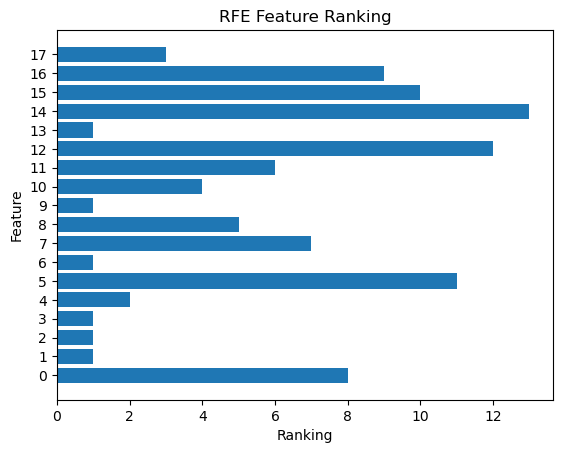

In [146]:
def plot_rfe(rfe, features):
    ranking = rfe. ranking_
    
    # Check if the length of features matches the length of rankings
    if len(features) != len(ranking):
        raise ValueError(f"Shape mismatch: 'features' has shape {len(features)}, but 'ranking' has shape {len(ranking)}.")

    plt.barh(range(len(features)), ranking, align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Ranking')
    plt.ylabel('Feature')
    plt.title('RFE Feature Ranking')
    plt.show()

# Assuming you have used RFE correctly as before
# Ensure that 'features' is the correct list of all feature names
plot_rfe(rfe, X.columns)  # Use X.columns to ensure correct length


Text(0.5, 1.0, 'Correlation Heatmap')

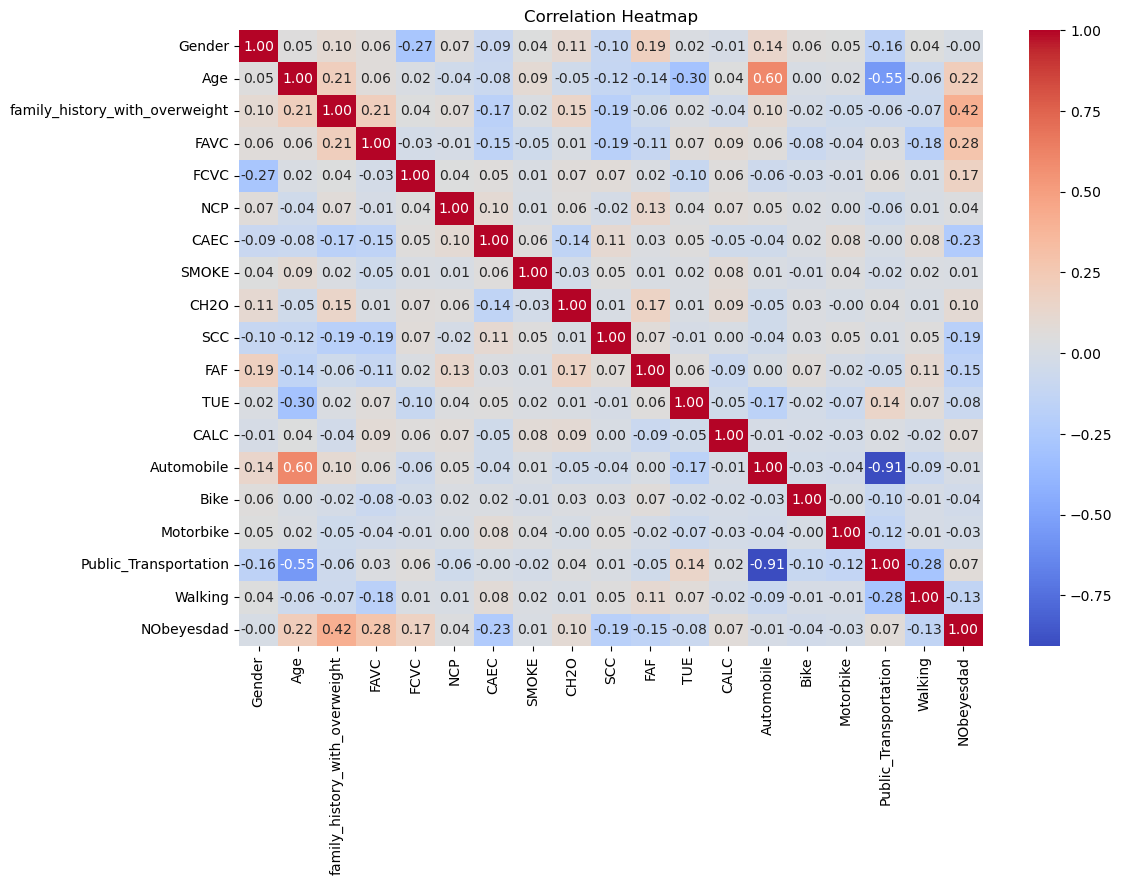

In [148]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(obesity.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

/Users/Surface1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


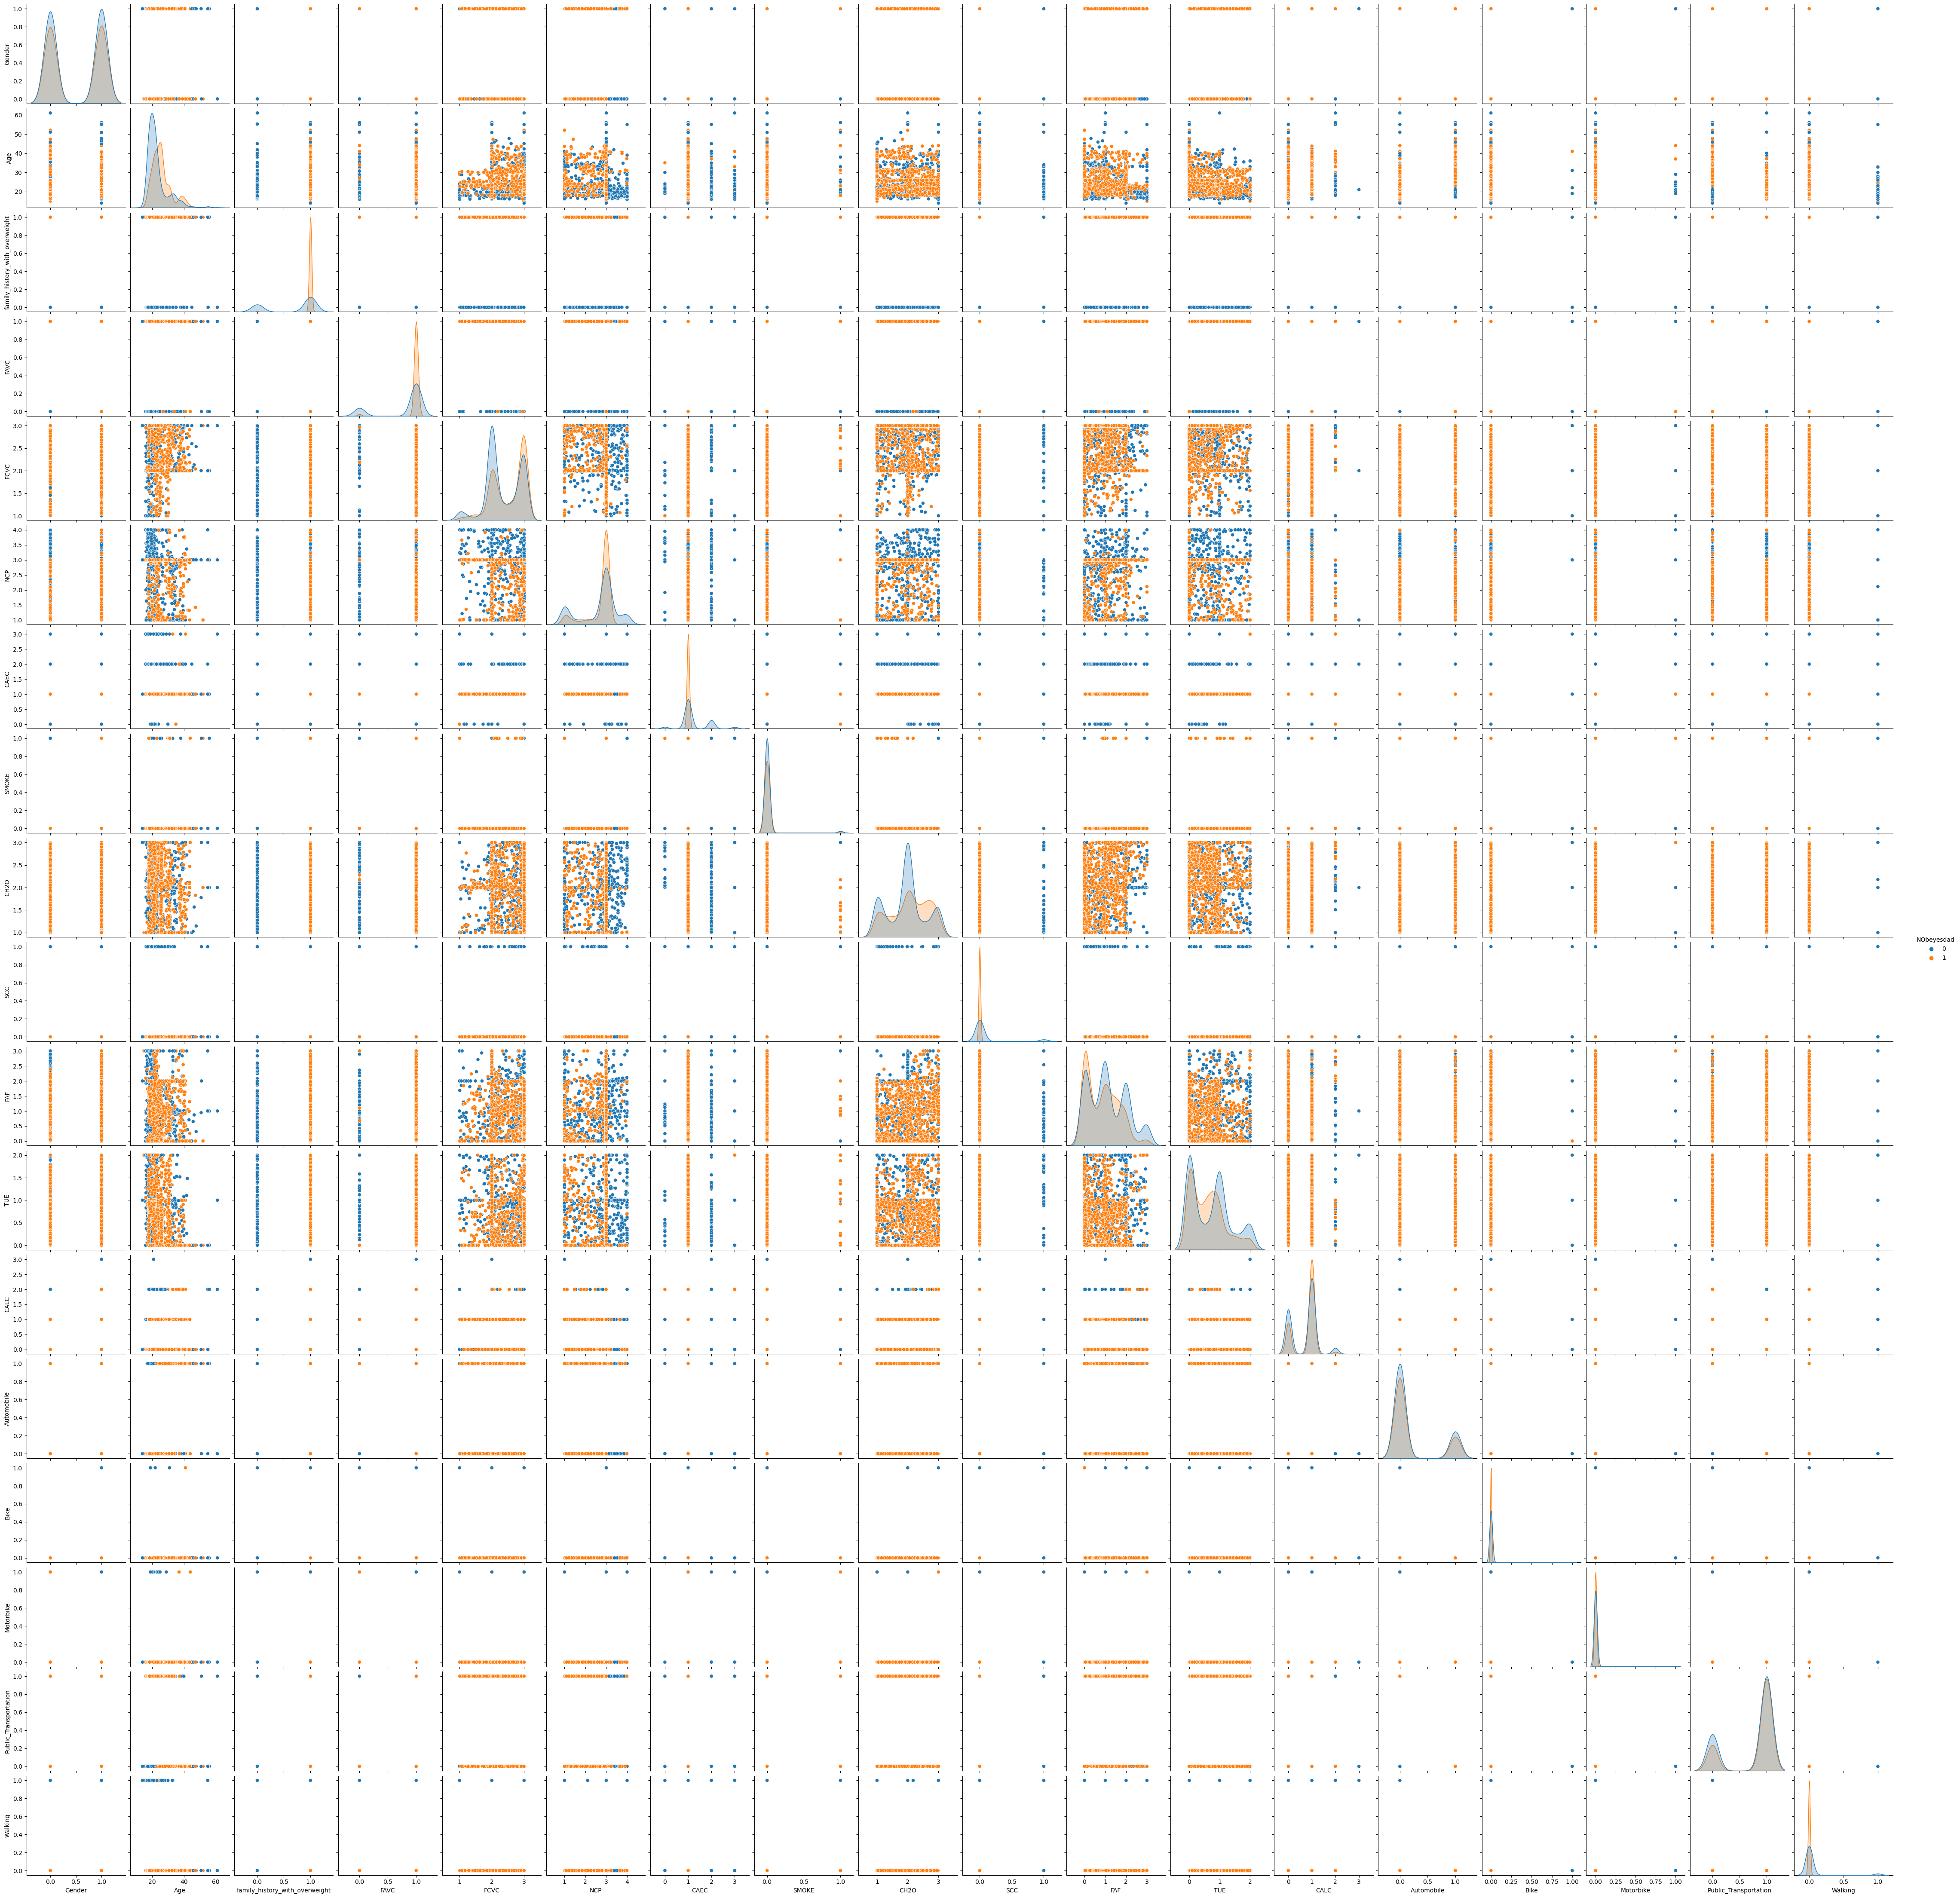

In [151]:
# Pairplot to explore relationships
sns.pairplot(obesity, hue='NObeyesdad') 

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network Architecture
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  
])

In [163]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6019 - loss: 0.6949 - val_accuracy: 0.7264 - val_loss: 0.5547
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7767 - loss: 0.5190 - val_accuracy: 0.7635 - val_loss: 0.4624
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7842 - loss: 0.4397 - val_accuracy: 0.7939 - val_loss: 0.4162
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8224 - loss: 0.3947 - val_accuracy: 0.7905 - val_loss: 0.4020
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8463 - loss: 0.3597 - val_accuracy: 0.8209 - val_loss: 0.3683
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8618 - loss: 0.3443 - val_accuracy: 0.8378 - val_loss: 0.3679
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8594 - loss: 0.3380 - val_accuracy: 0.8547 - val_loss: 0.3444
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8762 - loss: 0.3093 - val_accuracy: 0.86

In [165]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("\nNeural Network Performance:")
print("Accuracy:", accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9051 - loss: 0.3654

Neural Network Performance:
Accuracy: 0.9022082090377808
